## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [3]:
## 確認硬體資源
"""
Your code here
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [9]:
import os
import keras

# Try to enable GPU (optional)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\JL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
train, test = keras.datasets.cifar10.load_data()

In [33]:
x_train, y_train = train
x = x_train.reshape((len(x_train), -1))
min=x.min(axis=0)
max=x.max(axis=0)
x_std = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
min=x_std.min(axis=0)
max=x_std.max(axis=0)
print(x_std)
x_scaled = x_std * (max - min) + min
print(x_scaled)
#print(x_train.reshape((len(x_train), -1)))
#print(x.max(axis=0))

[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
[[ 59.  62.  63. ... 123.  92.  72.]
 [154. 177. 187. ... 143. 133. 144.]
 [255. 255. 255. ...  80.  86.  84.]
 ...
 [ 35. 178. 235. ...  12.  31.  50.]
 [189. 211. 240. ... 195. 190. 171.]
 [229. 229. 239. ... 163. 163. 161.]]


In [34]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))
    min=-1
    max=1
    x_std = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    x_scaled = x_std * (max - min) + min
    return x_scaled
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [35]:
x_train, y_train = train
x_test, y_test = test
#print(x_train)
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)
print(x_train)
# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
print(y_train)

[[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
  -0.43529412]
 [ 0.20784314  0.38823529  0.46666667 ...  0.12156863  0.04313725
   0.12941176]
 [ 1.          1.          1.         ... -0.37254902 -0.3254902
  -0.34117647]
 ...
 [-0.7254902   0.39607843  0.84313725 ... -0.90588235 -0.75686275
  -0.60784314]
 [ 0.48235294  0.65490196  0.88235294 ...  0.52941176  0.49019608
   0.34117647]
 [ 0.79607843  0.79607843  0.8745098  ...  0.27843137  0.27843137
   0.2627451 ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [39]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64 ,32]):
    input_layer = keras.layers.Input(input_shape)    
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)  
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [40]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [43]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 5
BATCH_SIZE = 256

In [44]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [45]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 32s 647us/step - loss: 1.7249 - acc: 0.3847 - val_loss: 1.5559 - val_acc: 0.4455
Epoch 2/5
50000/50000 [==============================] - 24s 474us/step - loss: 1.4949 - acc: 0.4720 - val_loss: 1.4703 - val_acc: 0.4769
Epoch 3/5
50000/50000 [==============================] - 24s 480us/step - loss: 1.3732 - acc: 0.5159 - val_loss: 1.4130 - val_acc: 0.5079
Epoch 4/5
50000/50000 [==============================] - 24s 479us/step - loss: 1.2808 - acc: 0.5473 - val_loss: 1.3884 - val_acc: 0.5116
Epoch 5/5
50000/50000 [==============================] - 28s 567us/step - loss: 1.1978 - acc: 0.5802 - val_loss: 1.3963 - val_acc: 0.5167


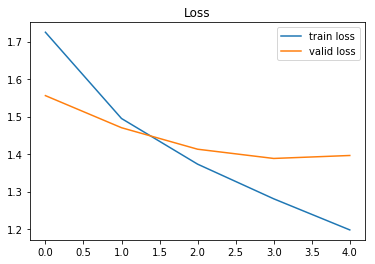

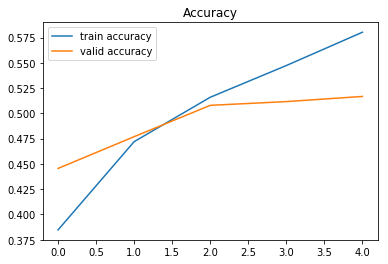

In [47]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()